In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import linear_regression
import datetime
import random
import tslearn
import scipy
from numpy.polynomial.polynomial import polyfit
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn import linear_model
random.seed(0)

In [3]:
from print_versions import print_versions
import sys

print(sys. version)
print_versions(globals())

3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:17:27) [MSC v.1929 64 bit (AMD64)]
pandas==2.2.3
numpy==1.26.4
tslearn==0.6.3
scipy==1.15.1


# Bank Reserves

In [4]:
br_poor = pd.read_csv("C:/Users/met48/Desktop/TS-Clustering/SimData/bank_reserves_outputs_poor.csv", header=None)
br_middle = pd.read_csv("C:/Users/met48/Desktop/TS-Clustering/SimData/bank_reserves_outputs_middle.csv", header=None)
br_rich = pd.read_csv("C:/Users/met48/Desktop/TS-Clustering/SimData/bank_reserves_outputs_rich.csv", header=None)
br_inputs = pd.read_csv("C:/Users/met48/Desktop/TS-Clustering/SimData/bank_reserves_inputs.csv", header=None)

In [5]:
slopes_scipy = []
#slopes_lr = []
#intercepts_lr = []
for index, row in br_poor.iterrows():
    y = np.array(row)
    x = np.arange(0, y.size)
    x = x[:,np.newaxis]
    a, _, _, _ = np.linalg.lstsq(x, y)
    #slope, intercept = linear_regression(x, y, proportional=True)
    slopes_scipy.append(a)
    #slopes_lr.append(slope)
    #intercepts_lr.append(intercept)

C:\Users\met48\AppData\Local\Temp\ipykernel_25504\2192925672.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  a, _, _, _ = np.linalg.lstsq(x, y)


In [6]:
slopes_scipy = np.concatenate(slopes_scipy, axis=0)

In [7]:
br_inputs_arr = br_inputs.iloc[:, 0].to_numpy()

In [8]:
br_inputs_arr

array([76.02257126, 78.36975458, 98.83249299, ..., 51.83870099,
       61.8066298 , 67.07348799])

In [9]:
br_inputs_arr.reshape(-1, 1)

array([[76.02257126],
       [78.36975458],
       [98.83249299],
       ...,
       [51.83870099],
       [61.8066298 ],
       [67.07348799]])

In [10]:
slopes_scipy

array([ 0.50608246,  0.40145116, -0.        , ...,  1.3723984 ,
        0.96106399,  0.82557411])

In [11]:
reg = linear_model.LinearRegression().fit(br_inputs_arr.reshape(-1, 1), slopes_scipy.reshape(-1, 1))
reg.score(br_inputs_arr.reshape(-1, 1), slopes_scipy.reshape(-1, 1))

0.8899843314952712

In [12]:
scipy.stats.pearsonr(br_inputs_arr, slopes_scipy)

PearsonRResult(statistic=-0.9433898088782128, pvalue=0.0)

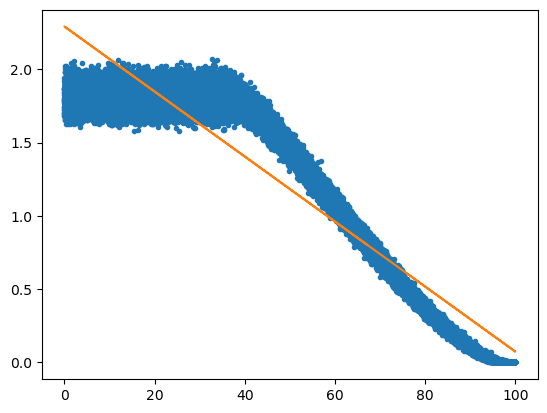

In [13]:
b, m = polyfit(br_inputs_arr, slopes_scipy, 1)

plt.plot(br_inputs_arr, slopes_scipy, '.')
plt.plot(br_inputs_arr, b + m * br_inputs_arr, '-')
plt.show()

In [14]:
br_inputs_class = []
for val in slopes_scipy:
    if val < 0.5:
        br_inputs_class.append("lt 0.5")
    elif val >= 0.5 and val < 1:
        br_inputs_class.append("0.5-1")
    elif val >= 1 and val < 1.5:
        br_inputs_class.append("1-1.5")
    else:
        br_inputs_class.append("gt 1.5")

In [15]:
X_train, X_test, y_train, y_test = train_test_split(br_inputs_arr, br_inputs_class, test_size=0.2, random_state=1) 

In [16]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train.reshape(-1, 1),y_train)
y_pred = clf.predict(X_test.reshape(-1, 1))

In [17]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.97015


# Epstein Civil Violence

In [53]:
ecv_active = pd.read_csv("C:/Users/met48/Desktop/TS-Clustering/SimData/epsteinCV_outputs_active.csv", header=None)
ecv_jailed = pd.read_csv("C:/Users/met48/Desktop/TS-Clustering/SimData/epsteinCV_outputs_jailed.csv", header=None)
ecv_quiet = pd.read_csv("C:/Users/met48/Desktop/TS-Clustering/SimData/epsteinCV_outputs_quiet.csv", header=None)
ecv_inputs = pd.read_csv("C:/Users/met48/Desktop/TS-Clustering/SimData/epsteinCV_inputs.csv", header=None, sep=" ")

In [54]:
ecv_inputs

,0,1,2
0,0.579364,0.362797,0.045004
1,0.905778,0.049225,0.769210
2,0.761473,0.167152,0.565592
3,0.979122,0.007172,0.161529
4,0.521911,0.427794,0.762568
...,...,...,...
50357,0.988652,0.004317,0.274946
50358,0.726030,0.203366,0.597790
50359,0.849297,0.057407,0.704192
50360,0.976113,0.002261,0.987066


In [55]:
slopes_scipy = []
#slopes_lr = []
#intercepts_lr = []
for index, row in ecv_active.iterrows():
    y = np.array(row)
    x = np.arange(0, y.size)
    x = x[:,np.newaxis]
    a, _, _, _ = np.linalg.lstsq(x, y)
    #slope, intercept = linear_regression(x, y, proportional=True)
    slopes_scipy.append(a)
    #slopes_lr.append(slope)
    #intercepts_lr.append(intercept)

C:\Users\met48\AppData\Local\Temp\ipykernel_25504\2294856357.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  a, _, _, _ = np.linalg.lstsq(x, y)


In [56]:
slopes_scipy = np.concatenate(slopes_scipy, axis=0)
br_inputs_arr = ecv_inputs.to_numpy()

In [57]:
br_inputs_arr.reshape(-1, 3)

array([[0.57936369, 0.36279704, 0.0450042 ],
       [0.90577819, 0.04922511, 0.76920957],
       [0.7614733 , 0.16715225, 0.5655921 ],
       ...,
       [0.84929667, 0.05740677, 0.70419192],
       [0.97611302, 0.00226105, 0.98706616],
       [0.94649952, 0.01486282, 0.39914755]])

In [58]:
reg = linear_model.LinearRegression().fit(br_inputs_arr.reshape(-1, 3), slopes_scipy.reshape(-1, 1))
reg.score(br_inputs_arr.reshape(-1, 3), slopes_scipy.reshape(-1, 1))

0.30103337875167124

In [65]:
br_inputs_arr

array([[0.57936369, 0.36279704, 0.0450042 ],
       [0.90577819, 0.04922511, 0.76920957],
       [0.7614733 , 0.16715225, 0.5655921 ],
       ...,
       [0.84929667, 0.05740677, 0.70419192],
       [0.97611302, 0.00226105, 0.98706616],
       [0.94649952, 0.01486282, 0.39914755]])

In [64]:
br_inputs_arr[:,0]

array([0.57936369, 0.90577819, 0.7614733 , ..., 0.84929667, 0.97611302,
       0.94649952])

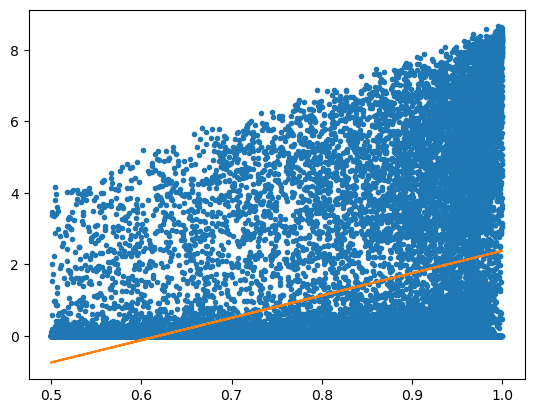

In [67]:
b, m = polyfit(br_inputs_arr[:,0], slopes_scipy, 1)

plt.plot(br_inputs_arr[:,0], slopes_scipy, '.')
plt.plot(br_inputs_arr[:,0], b + m * br_inputs_arr[:,0], '-')
plt.show()

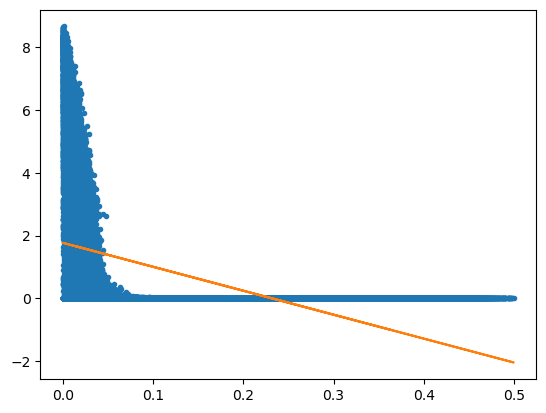

In [68]:
b, m = polyfit(br_inputs_arr[:,1], slopes_scipy, 1)

plt.plot(br_inputs_arr[:,1], slopes_scipy, '.')
plt.plot(br_inputs_arr[:,1], b + m * br_inputs_arr[:,1], '-')
plt.show()

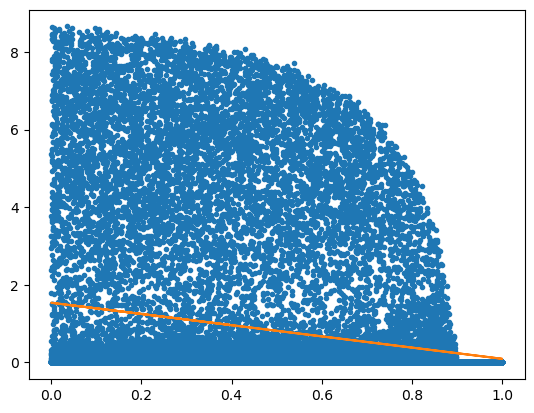

In [69]:
b, m = polyfit(br_inputs_arr[:,2], slopes_scipy, 1)

plt.plot(br_inputs_arr[:,2], slopes_scipy, '.')
plt.plot(br_inputs_arr[:,2], b + m * br_inputs_arr[:,2], '-')
plt.show()

In [24]:
br_inputs_class = []
for val in slopes_scipy:
    if val < 2:
        br_inputs_class.append("lt 0.5")
    elif val >= 2 and val < 4:
        br_inputs_class.append("0.5-1")
    elif val >= 4 and val < 6:
        br_inputs_class.append("1-1.5")
    else:
        br_inputs_class.append("gt 1.5")

In [25]:
X_train, X_test, y_train, y_test = train_test_split(br_inputs_arr, br_inputs_class, test_size=0.2, random_state=1) 

In [26]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train.reshape(-1, 3),y_train)
y_pred = clf.predict(X_test.reshape(-1, 3))

In [27]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.945994242033158


# Forest Fire

In [28]:
def import_ff_data(filename):
    expected_columns=155
    data = []
    with open(filename, 'r') as file:
        for line in file:
            row = line.strip().split(',')
            if len(row) < expected_columns:
                row += [np.nan] * (expected_columns - len(row))
            data.append(row)
    df = pd.DataFrame(data)
    def fill_last_valid(row):
        for i in range(1, len(row)):
            if pd.isna(row[i]):
                row[i] = row[i - 1]  
        return row
    df_filled = df.apply(fill_last_valid, axis=1)
    return df_filled

In [29]:
ff_onfire = import_ff_data("C:/Users/met48/Desktop/TS-Clustering/SimData/forest_fire_outputs_onfire.csv")
print("check 1")
ff_fine = import_ff_data("C:/Users/met48/Desktop/TS-Clustering/SimData/forest_fire_outputs_fine.csv")
print("check 2")
ff_burned = import_ff_data("C:/Users/met48/Desktop/TS-Clustering/SimData/forest_fire_outputs_burned.csv")

check 1
check 2


In [31]:
ff_burned

,0,1,2,3,4,5,6,7,8,9,...,145,146,147,148,149,150,151,152,153,154
0,0,223,535,905,1315,1719,2117,2507,2883,3320,...,8456,8456,8456,8456,8456,8456,8456,8456,8456,8456
1,0,61,116,146,189,255,315,365,409,461,...,3179,3179,3179,3179,3179,3179,3179,3179,3179,3179
2,0,112,217,328,494,680,824,947,1097,1199,...,5085,5085,5085,5085,5085,5085,5085,5085,5085,5085
3,0,183,432,716,995,1275,1601,1931,2216,2579,...,7867,7867,7867,7867,7867,7867,7867,7867,7867,7867
4,0,92,177,258,315,383,491,601,709,815,...,4622,4622,4622,4622,4622,4622,4622,4622,4622,4622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,71,124,162,198,250,309,350,399,437,...,3436,3436,3436,3436,3436,3436,3436,3436,3436,3436
99996,0,7,8,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
99997,0,99,209,323,445,555,678,784,897,984,...,4876,4876,4876,4876,4876,4876,4876,4876,4876,4876
99998,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [34]:
ff_inputs = pd.read_csv("C:/Users/met48/Desktop/TS-Clustering/SimData/forest_fire_inputs.csv", header=None, sep=" ")

In [33]:
slopes_scipy = []
#slopes_lr = []
#intercepts_lr = []
for index, row in ff_burned.iterrows():
    y = np.array(row)
    x = np.arange(0, y.size)
    x = x[:,np.newaxis]
    a, _, _, _ = np.linalg.lstsq(x.astype('float'), y.astype('float'))
    #slope, intercept = linear_regression(x, y, proportional=True)
    slopes_scipy.append(a)
    #slopes_lr.append(slope)
    #intercepts_lr.append(intercept)

C:\Users\met48\AppData\Local\Temp\ipykernel_25504\3868550010.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  a, _, _, _ = np.linalg.lstsq(x.astype('float'), y.astype('float'))


In [35]:
slopes_scipy = np.concatenate(slopes_scipy, axis=0)

In [37]:
br_inputs_arr = ff_inputs.iloc[:, 0].to_numpy()

In [38]:
br_inputs_arr

array([0.84442185, 0.42057158, 0.51127472, ..., 0.51498079, 0.05380878,
       0.25663673])

In [39]:
br_inputs_arr.reshape(-1, 1)

array([[0.84442185],
       [0.42057158],
       [0.51127472],
       ...,
       [0.51498079],
       [0.05380878],
       [0.25663673]])

In [40]:
slopes_scipy

array([8.15109594e+01, 2.84334864e+01, 4.82367704e+01, ...,
       4.60294386e+01, 9.70873786e-03, 8.15186630e-01])

In [41]:
reg = linear_model.LinearRegression().fit(br_inputs_arr.reshape(-1, 1), slopes_scipy.reshape(-1, 1))
reg.score(br_inputs_arr.reshape(-1, 1), slopes_scipy.reshape(-1, 1))

0.9392440237205283

In [42]:
scipy.stats.pearsonr(br_inputs_arr, slopes_scipy)

PearsonRResult(statistic=0.9691460280682827, pvalue=0.0)

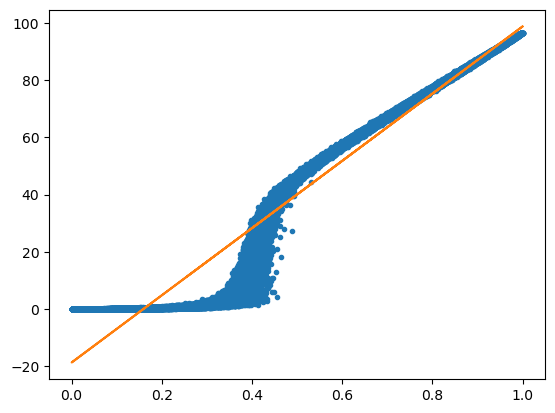

In [43]:
b, m = polyfit(br_inputs_arr, slopes_scipy, 1)

plt.plot(br_inputs_arr, slopes_scipy, '.')
plt.plot(br_inputs_arr, b + m * br_inputs_arr, '-')
plt.show()

In [48]:
br_inputs_class = []
for val in slopes_scipy:
    if val < 25:
        br_inputs_class.append("lt 0.5")
    elif val >= 25 and val < 50:
        br_inputs_class.append("0.5-1")
    elif val >= 50 and val < 75:
        br_inputs_class.append("1-1.5")
    else:
        br_inputs_class.append("gt 1.5")

In [49]:
X_train, X_test, y_train, y_test = train_test_split(br_inputs_arr, br_inputs_class, test_size=0.2, random_state=1) 

In [50]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train.reshape(-1, 1),y_train)
y_pred = clf.predict(X_test.reshape(-1, 1))

In [51]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.97695
